## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 82](#Problem-82)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>



"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 82 <a name="Problem-82"></a>

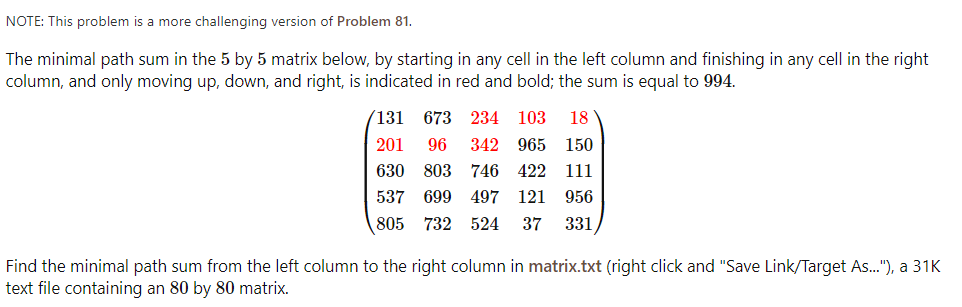

<br>
$**Hint**$

For this problem and the next, you have to be familiar with [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) and [heapq module](https://www.geeksforgeeks.org/heap-queue-or-heapq-in-python/).

Follow these instructions
1. Create a memoization table to store the minimum path sums
2. Calculate the minimum path sum for each position with respect to desired movements.

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time
import heapq  #priority queue

## Main Solution <a name="Main-Solution"></a>

First we build our matrix from the content of the file

In [ ]:
matrix = []
with open("0082_matrix.txt", 'r') as file:
    for line in file:
        row = list(map(int, line.strip().split(',')))
        matrix.append(row)

Now we tackle the problem

In [ ]:
start_time = time.time()

rows = len(matrix)
columns = len(matrix[0])

# Create a distance memory to store the minimal path sums
memory = [[float('inf')] * columns for _ in range(rows)]

# Define the directions for movement
directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Initialize the priority queue with the values in the left column
queue = []
for row in range(rows):
    memory[row][0] = matrix[row][0]
    heapq.heappush(queue, (memory[row][0], row, 0))

# Apply Dijkstra's algorithm
while queue:
    dist, row, column = heapq.heappop(queue)

    # Skip if a shorter path has already been found
    if dist > memory[row][column]:
        continue

    # Explore all possible directions
    for drow, dcolumn in directions:
        new_row = row + drow
        new_column = column + dcolumn

        # Check if the new position is within the matrix boundaries
        if 0 <= new_row < rows and 0 <= new_column < columns:
            new_dist = dist + matrix[new_row][new_column]

            # Update the minimal path sum if a shorter path is found
            if new_dist < memory[new_row][new_column]:
                memory[new_row][new_column] = new_dist
                heapq.heappush(queue, (new_dist, new_row, new_column))

# Find the minimal path sum in the right column
answer = min(memory[row][columns - 1] for row in range(rows))


end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 260324 
Execution time: 0.0289 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

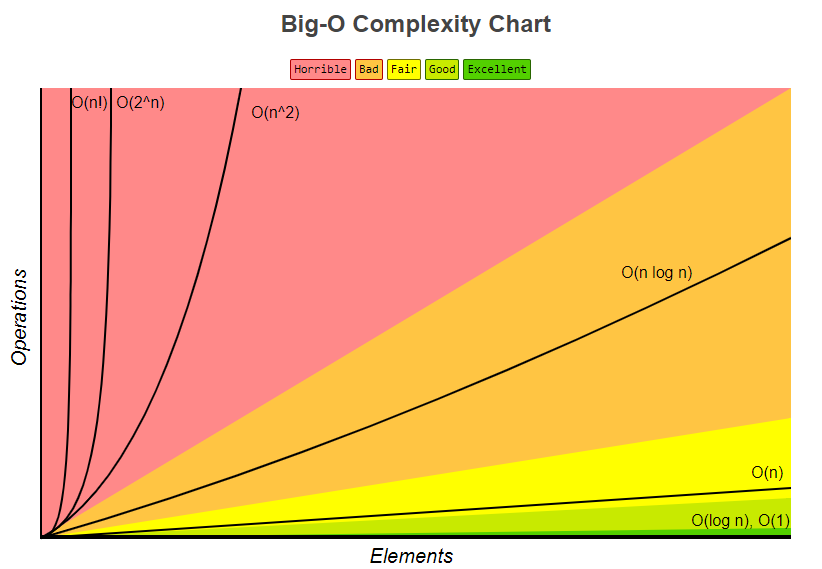

The time and space complexity of my code can be analyzed as follows:

Time Complexity:
1. Reading the matrix: The code reads the matrix from a file, which takes $O(rows * columns)$ time, where "rows" and "columns" are the dimensions of the matrix.

2. Initializing the distance memory: This step creates a memory grid of size $O(rows * columns)$ and initializes all cells to infinity. This operation takes $O(rows * columns)$ time.

3. Initializing the priority queue: The code initializes the priority queue with the values in the left column of the matrix. This operation takes $O(rows)$ time.

4. Dijkstra's algorithm: The main part of the code applies Dijkstra's algorithm to find the minimal path sums. In the worst case, each cell in the matrix is visited once, and for each cell, the code explores all possible directions. Therefore, the time complexity of Dijkstra's algorithm in this code is $O(rows * columns)$.

5. Finding the minimal path sum: After applying Dijkstra's algorithm, the code finds the minimal path sum in the right column of the matrix. This operation takes $O(rows)$ time.

As a result, the overall **time complexity** of the code is dominated by the Dijkstra's algorithm step, which is $O(rows * columns)$.


Space Complexity:
1. Reading the matrix: The code stores the matrix in a 2D list, which requires $O(rows * columns)$ space.

2. Distance memory: The code creates a 2D list called `memory` to store the minimal path sums for each cell. This memory grid requires $O(rows * columns)$ space.

3. Priority queue: The code uses a list called `queue` to implement the priority queue. The size of the `queue` can grow up to the maximum number of cells in the matrix, which is $O(rows * columns)$ in the worst case.

4. Other variables: The code uses additional variables to store the dimensions of the matrix, directions for movement, etc. These variables require a constant amount of space, so they don't contribute significantly to the overall space complexity.

Therefore, the overall **space complexity** of the code is $O(rows * columns)$.

In summary, the **time complexity** of the code is $O(rows * columns)$, and the **space complexity** is also $O(rows * columns)$.